# 3.01 Stable Isotope Calculation Templates - Fe isotopes
*Simon Matthews (simonm@hi.is), July 2025*

---

This notebook is intended to be a starting point for setting up calculations of stable Fe isotope fractionation during multi-component mantle melting. See other templates to set up a different set of lithologies, if you want to calculate trace elements, or to model other stable isotope systems.

The calculations here loosely follow those in Soderman et al. (XXXX), except for explicitly considering magma aggregation.

Though I have added some description of each step, to find a more comprehensive account of why the calculation is structured the way it is see the pyMelt documentation and tutorials.

## 1. Preliminaries

Import required packages:

In [1]:
import pyMelt as m
import numpy as np
import matplotlib.pyplot as plt

Retrieve a lherzolite and pyroxenite lithology. In this case, the parameterisations of KLB1 and KG1 given in Matthews et al. (2021). KLB1 represents fertile lherzolite mantle, and KG1 represents a mixture between a MORB-like eclogite composition and lherzolite. These lithologies have thermocalc phase diagrams attached.

In [2]:
lz = m.lithologies.matthews.klb1()
px = m.lithologies.matthews.kg1()

Create a mantle object with 10% pyroxenite:

In [8]:
mantle = m.mantle([lz, px], [0.9, 0.1], ['lz', 'px'])

## 2. Melt the mantle

Melt the mantle assuming a $T_p$=1450˚C to produce a melting column of incremental melts.

In [9]:
column = mantle.adiabaticMelt(1450.0)

/Users/simonm/repos/pyMelt/.venv/lib/python3.9/site-packages/pyMelt/mantle_class.py:476: UserWarning: Freezing prevented.
  _warn("Freezing prevented.")


We can visualise the results of the melting calculation:

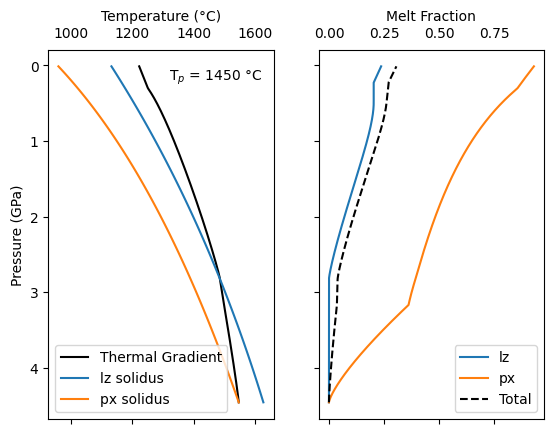

In [10]:
f, a = column.plot()

## 3. Calculate chemical properties of the melting column
First, calculate the residuum mineralogy at each step. The mineral proportions are extracted from the phase diagram attached to each lithology. This is required by the Fe-isotope calculations:

In [11]:
column.calculateMineralProportions()

We can see the results by plotting them directly:

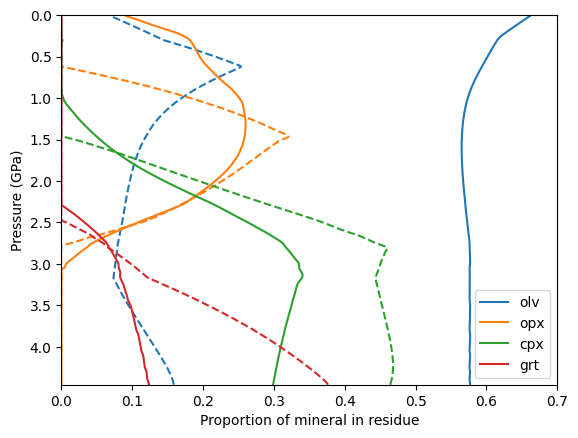

In [17]:
f, a = plt.subplots()

colours = {'olv': 'C0', 'opx': 'C1', 'cpx': 'C2', 'grt': 'C3'}

for min in ['olv', 'opx', 'cpx', 'grt']:
    a.plot(column.composition['lz'][min], column.P, c=colours[min], label=min)
    a.plot(column.composition['px'][min], column.P, c=colours[min], ls='--')

a.legend(loc='lower right')
a.set_xlabel('Proportion of mineral in residue')
a.set_ylabel('Pressure (GPa)')

a.set_xlim(0, 0.7)
a.set_ylim(np.nanmax(column.P), 0.0)

plt.show()

The final information needed before we can calculate stable isotopes is the Fe<sup>2+</sup> and Fe<sup>3+</sup> content of the melt and each mineral phase at each step. This is information which is looked up from the phase diagram attached to the lithology.

In [18]:
column.calculateMajorOxides()

Again, we can visualise these results. *Note that when a phase is not present, the oxide concentration is set to 0.0*.

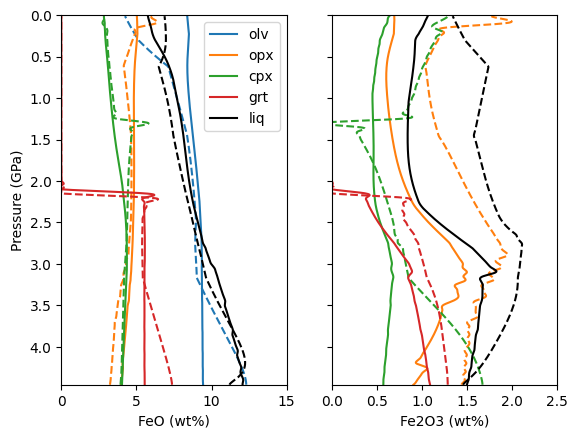

In [29]:
f, a = plt.subplots(1, 2, sharey='row')

colours = {'olv': 'C0', 'opx': 'C1', 'cpx': 'C2', 'grt': 'C3', 'liq': 'k'}

for min in ['olv', 'opx', 'cpx', 'grt', 'liq']:
    a[0].plot(column.composition['lz'][min+'_FeO_wtpt'], column.P,
              c=colours[min], label=min)
    a[0].plot(column.composition['px'][min+'_FeO_wtpt'], column.P, 
              c=colours[min], ls='--')
    a[1].plot(column.composition['lz'][min+'_Fe2O3_wtpt'], column.P,
              c=colours[min])
    a[1].plot(column.composition['px'][min+'_Fe2O3_wtpt'], column.P, 
              c=colours[min], ls='--')
    
a[0].set_ylim(np.nanmax(column.P), 0.0)
a[0].set_xlim(0, 15)
a[1].set_xlim(0, 2.5)

a[0].set_ylabel('Pressure (GPa)')
a[0].set_xlabel('FeO (wt%)')
a[1].set_xlabel('Fe2O3 (wt%)')

a[0].legend()

plt.show()

All of these results are now embedded in the melting column object, and so they can now be used by the stable isotope calculations.

## 4. Setup stable isotope calculations

A mineral-melt fractionation factor must be defined for each mineral, as well as the Fe isotope ratio of solid lithology before melting.

## References

Matthews, S., Wong, K., Shorttle, O., Edmonds, M., & Maclennan, J. (2021). Do olivine crystallization temperatures faithfully record mantle temperature variability? Geochemistry, Geophysics, Geosystems, 22, e2020GC009157. https://doi.org/10.1029/2020GC009157